In [67]:
import pandas as pd
import numpy as np

# Load Dataset 
read_file = pd.read_excel("https://github.com/fakhrirobi/ML_Pacmann_5/blob/main/final/20221120_1110_final_data_2018_2022.xlsx?raw=true")
read_file.to_csv("final_data_2018_2022.csv",
                 index = None,
                 header = True)

df = pd.DataFrame(pd.read_csv("final_data_2018_2022.csv"))
df.rename(columns={'Unnamed: 0': 'tanggal'}, inplace=True)
df


,tanggal,balikpapan,bandung,batam,jakarta,makassar,medan,palembang,pekanbaru,surabaya,yogyakarta
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-03,68300.0,48200.0,63650.0,61350.0,26550.0,50000.0,58500.0,70950.0,54700.0,70750.0
3,2018-01-04,68300.0,48200.0,63650.0,61350.0,26550.0,50000.0,58500.0,70950.0,54700.0,70750.0
4,2018-01-05,68300.0,48200.0,63650.0,61350.0,26550.0,50000.0,58500.0,70950.0,54700.0,70750.0
...,...,...,...,...,...,...,...,...,...,...,...
1778,2022-11-14,130200.0,82450.0,83500.0,99350.0,48550.0,40750.0,89500.0,74600.0,82350.0,84700.0
1779,2022-11-15,130200.0,82450.0,83500.0,99350.0,48550.0,40750.0,89500.0,74600.0,82350.0,84700.0
1780,2022-11-16,125150.0,75450.0,84000.0,96350.0,50050.0,40750.0,80050.0,74600.0,77600.0,70600.0
1781,2022-11-17,125150.0,75450.0,84000.0,96350.0,50050.0,40750.0,80050.0,74600.0,77600.0,70600.0


Preprocessing Data

In [68]:
# Handling Missing Values
null_data = pd.isnull(df['balikpapan'])
df[null_data]

,tanggal,balikpapan,bandung,batam,jakarta,makassar,medan,palembang,pekanbaru,surabaya,yogyakarta
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1763,2022-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1769,2022-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770,2022-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776,2022-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# fill the missing values using linear interpolation
df = df.interpolate(limit_direction="both")
print(df)

         tanggal  balikpapan  bandung    batam  jakarta  makassar    medan  \
0     2018-01-01     68300.0  48200.0  63650.0  61350.0   26550.0  50000.0   
1     2018-01-02     68300.0  48200.0  63650.0  61350.0   26550.0  50000.0   
2     2018-01-03     68300.0  48200.0  63650.0  61350.0   26550.0  50000.0   
3     2018-01-04     68300.0  48200.0  63650.0  61350.0   26550.0  50000.0   
4     2018-01-05     68300.0  48200.0  63650.0  61350.0   26550.0  50000.0   
...          ...         ...      ...      ...      ...       ...      ...   
1778  2022-11-14    130200.0  82450.0  83500.0  99350.0   48550.0  40750.0   
1779  2022-11-15    130200.0  82450.0  83500.0  99350.0   48550.0  40750.0   
1780  2022-11-16    125150.0  75450.0  84000.0  96350.0   50050.0  40750.0   
1781  2022-11-17    125150.0  75450.0  84000.0  96350.0   50050.0  40750.0   
1782  2022-11-18    125150.0  75450.0  84000.0  96350.0   50050.0  40750.0   

      palembang  pekanbaru  surabaya  yogyakarta  
0       5850

In [70]:
# checking if there is a missing value or not
print(df.isnull().values.sum())

0


In [34]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.9 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [71]:
from prophet import Prophet
# check data type
df.dtypes

tanggal        object
balikpapan    float64
bandung       float64
batam         float64
jakarta       float64
makassar      float64
medan         float64
palembang     float64
pekanbaru     float64
surabaya      float64
yogyakarta    float64
dtype: object

In [72]:
# convert date to date-time format
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.dtypes

tanggal       datetime64[ns]
balikpapan           float64
bandung              float64
batam                float64
jakarta              float64
makassar             float64
medan                float64
palembang            float64
pekanbaru            float64
surabaya             float64
yogyakarta           float64
dtype: object

Anomaly Detection for Every CIty

In [143]:
# Initialized columns in every city
# Balikpapan City
# drop all city column exclude balikpapan
df_blp = df.drop(columns=["bandung", "batam", "jakarta", "makassar", "medan", "palembang", "pekanbaru", "surabaya", "yogyakarta"], axis=1)
df_blp.columns = ['ds', 'y']
# Bandung
# drop all city column exclude balikpapan
df_bdg = df.drop(columns=["balikpapan", "batam", "jakarta", "makassar", "medan", "palembang", "pekanbaru", "surabaya", "yogyakarta"], axis=1)
df_bdg.columns = ['ds', 'y']
# Batam
# drop all city column exclude batam
df_btm = df.drop(columns=["balikpapan", "bandung", "jakarta", "makassar", "medan", "palembang", "pekanbaru", "surabaya", "yogyakarta"], axis=1)
df_btm.columns = ['ds', 'y']
# Jakarta
# drop all city column exclude jakarta
df_jkt = df.drop(columns=["balikpapan", "bandung", "batam", "makassar", "medan", "palembang", "pekanbaru", "surabaya", "yogyakarta"], axis=1)
df_jkt.columns = ['ds', 'y']
# Makassar
# drop all city column exclude makassar
df_mks = df.drop(columns=["balikpapan", "bandung", "batam", "jakarta", "medan", "palembang", "pekanbaru", "surabaya", "yogyakarta"], axis=1)
df_mks.columns = ['ds', 'y']
# Medan
# drop all city column exclude palembang
df_mdn = df.drop(columns=["balikpapan", "bandung", "batam", "jakarta", "makassar", "palembang", "pekanbaru", "surabaya", "yogyakarta"], axis=1)
df_mdn.columns = ['ds', 'y']
# Palembang
# drop all city column exclude palembang
df_plb = df.drop(columns=["balikpapan", "bandung", "batam", "jakarta", "makassar", "medan", "pekanbaru", "surabaya", "yogyakarta"], axis=1)
df_plb.columns = ['ds', 'y']
# Pekanbaru
# drop all city column exclude pekanbaru
df_pkb = df.drop(columns=["balikpapan", "bandung", "batam", "jakarta", "makassar", "medan", "palembang", "surabaya", "yogyakarta"], axis=1)
df_pkb.columns = ['ds', 'y']
# Surabaya
# drop all city column exclude surabaya
df_sby = df.drop(columns=["balikpapan", "bandung", "batam", "jakarta", "makassar", "medan", "palembang", "pekanbaru", "yogyakarta"], axis=1)
df_sby.columns = ['ds', 'y']
# Yogyakarta
# drop all city column exclude surabaya
df_ygt = df.drop(columns=["balikpapan", "bandung", "batam", "jakarta", "makassar", "medan", "palembang", "pekanbaru", "surabaya"], axis=1)
df_ygt.columns = ['ds', 'y']

Balikpapan City

In [105]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_blp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/w8w05_ag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/pbngn1s3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89015', 'data', 'file=/tmp/tmpwhxm3r_0/w8w05_ag.json', 'init=/tmp/tmpwhxm3r_0/pbngn1s3.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_modelf93nha9v/prophet_model-20221120111540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


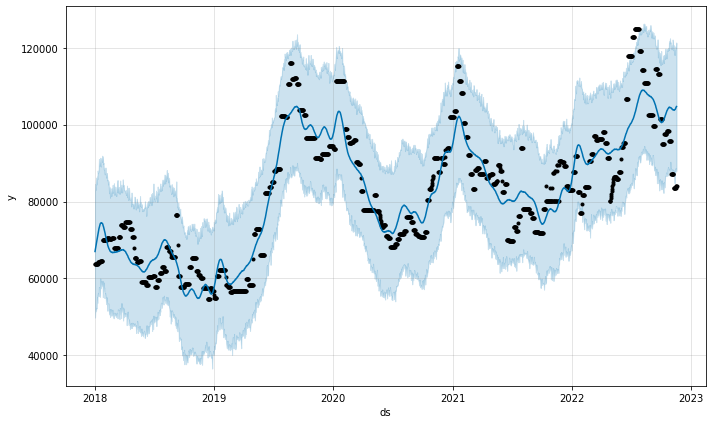

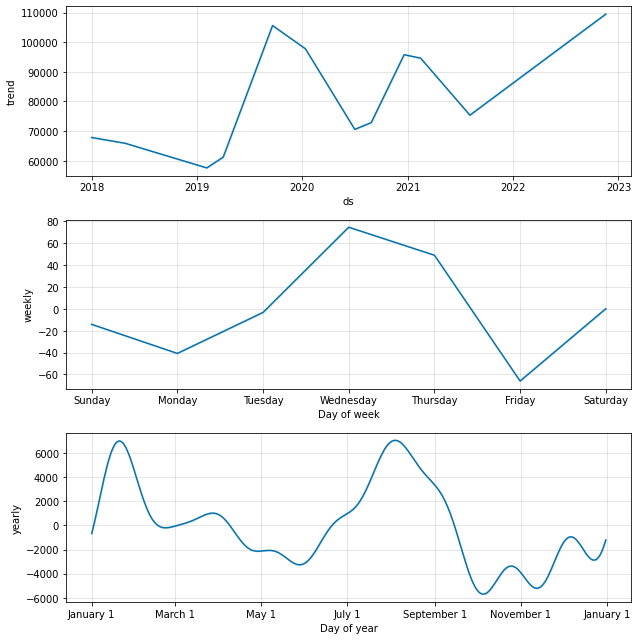

In [144]:
# Make prediction
forecast = model.predict(df_blp)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

# Merge actual and predicted values
performance = pd.merge(df_blp, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 221963944.66722605
The MAPE for the model is 0.12964966963317437


In [158]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()


0    1337
1     446
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
16,2018-01-17,56050.0,74221.849187,60005.828576,91383.315048,1
17,2018-01-18,56050.0,74369.236204,57382.938098,89376.134607,1
18,2018-01-19,56050.0,74370.625742,58391.763161,89098.792070,1
19,2018-01-20,56050.0,74496.295716,59242.400815,91220.301089,1
20,2018-01-21,56050.0,74484.910983,57946.893138,90763.837891,1
...,...,...,...,...,...,...
1778,2022-11-14,130200.0,103985.900067,87554.997921,119478.360878,1
1779,2022-11-15,130200.0,104163.542411,88666.117651,120409.874559,1
1780,2022-11-16,125150.0,104414.333874,88318.375759,119993.487860,1
1781,2022-11-17,125150.0,104593.516265,87856.452774,121376.736981,1


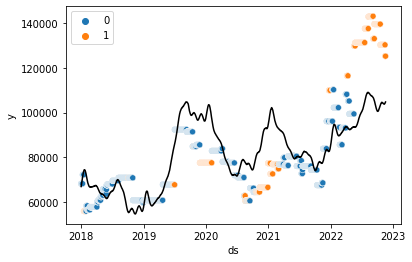

In [159]:
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
# Take a look at the anomalies
anomalies

Bandung City

In [160]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_bdg)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/2xmniycq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/o_gnlr2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99540', 'data', 'file=/tmp/tmpwhxm3r_0/2xmniycq.json', 'init=/tmp/tmpwhxm3r_0/o_gnlr2k.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_modeltef0tqhg/prophet_model-20221120123015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:30:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:30:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


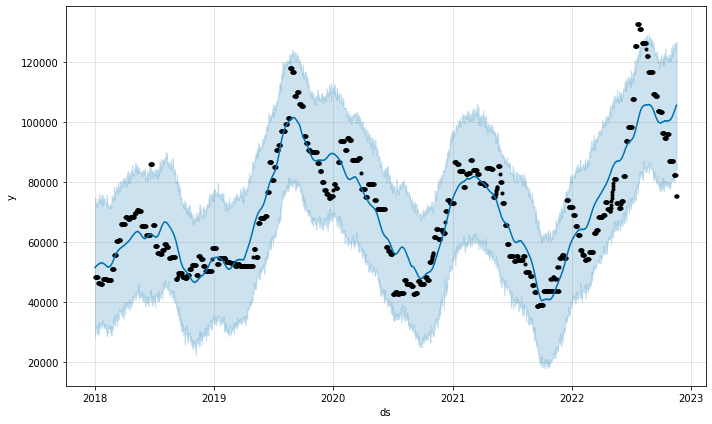

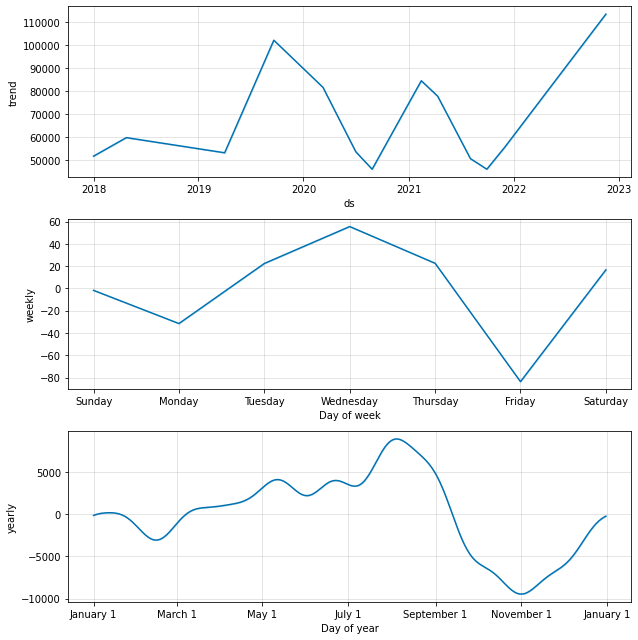

In [161]:
# Make prediction
forecast = model.predict(df_bdg)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [164]:
# Merge actual and predicted values
performance = pd.merge(df_bdg, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 68545631.42287841
The MAPE for the model is 0.09415908452388903


In [165]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1741
1      42
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
170,2018-06-20,86100.0,62588.058722,43997.069771,85777.262703,1
171,2018-06-21,86100.0,62570.097206,39936.051172,83344.837480,1
172,2018-06-22,86100.0,62459.824878,40474.951971,84380.586650,1
173,2018-06-23,86100.0,62537.596810,39910.271115,83543.233368,1
174,2018-06-24,86100.0,62479.038678,40134.060722,83527.645380,1
175,2018-06-25,86100.0,62393.127794,42071.067909,83425.397113,1
176,2018-06-26,86100.0,62377.066857,38742.223909,82449.613975,1
1654,2022-07-13,125250.0,96324.475317,77081.567337,120879.403089,1
1655,2022-07-14,125250.0,96663.961418,76929.608866,115973.787722,1
1656,2022-07-15,125250.0,96954.568252,74107.880440,117027.350515,1


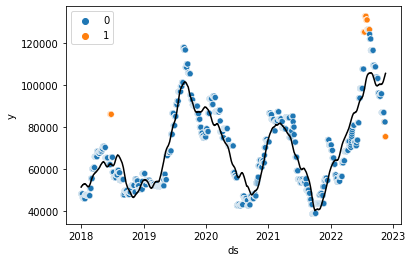

In [167]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies

Batam City

In [136]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_btm)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/z6vi69p7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/_auf561g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6532', 'data', 'file=/tmp/tmpwhxm3r_0/z6vi69p7.json', 'init=/tmp/tmpwhxm3r_0/_auf561g.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_modelnxs6zo81/prophet_model-20221120115327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:53:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:53:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


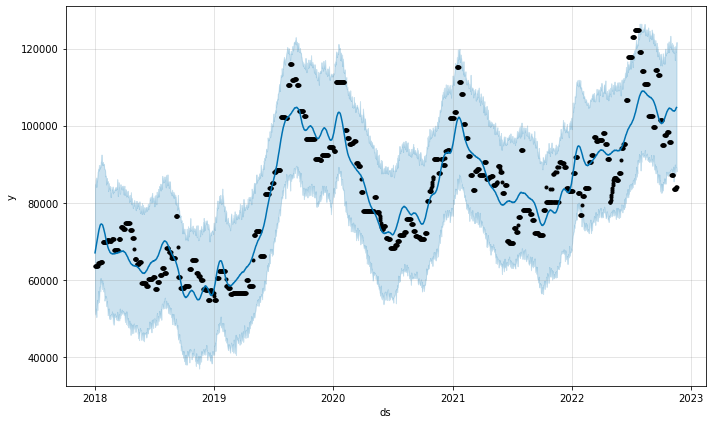

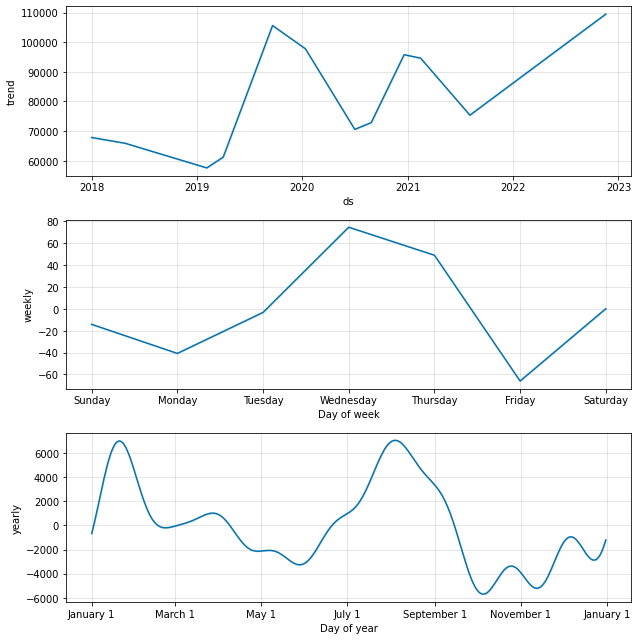

In [138]:
# Make prediction
forecast = model.predict(df_btm)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [168]:
# Merge actual and predicted values
performance = pd.merge(df_btm, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 287024832.7785106
The MAPE for the model is 0.1615621636241631


In [169]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1364
1     419
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
737,2020-01-08,111450.0,88972.856562,68834.841647,108396.780923,1
738,2020-01-09,111450.0,88839.796814,69043.535019,108547.656290,1
739,2020-01-10,111450.0,88629.076653,66734.707118,109740.023708,1
740,2020-01-11,111450.0,88620.843913,67846.617911,107358.599247,1
741,2020-01-12,111450.0,88489.737687,65271.274299,111312.813487,1
...,...,...,...,...,...,...
1666,2022-07-25,124900.0,101580.449700,79435.507445,123271.407058,1
1667,2022-07-26,124900.0,102064.683011,80013.952574,122228.796153,1
1780,2022-11-16,84000.0,105122.065891,85144.919440,124250.994198,1
1781,2022-11-17,84000.0,105392.889932,85609.840240,126699.822199,1


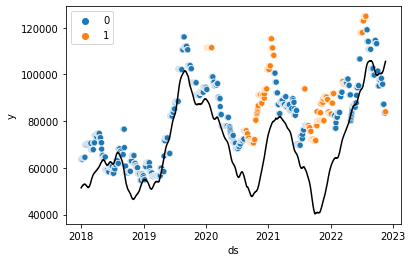

In [170]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies

Jakarta City

In [171]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_jkt)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/65u58nc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/m158inpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75245', 'data', 'file=/tmp/tmpwhxm3r_0/65u58nc6.json', 'init=/tmp/tmpwhxm3r_0/m158inpr.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_model6xyn0h7d/prophet_model-20221120123253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:32:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:32:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


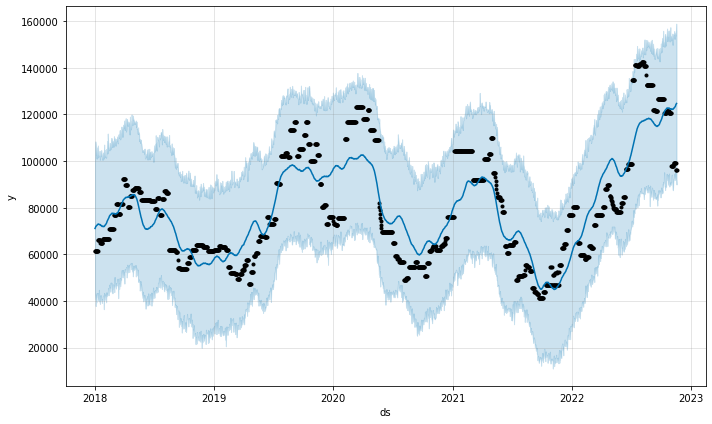

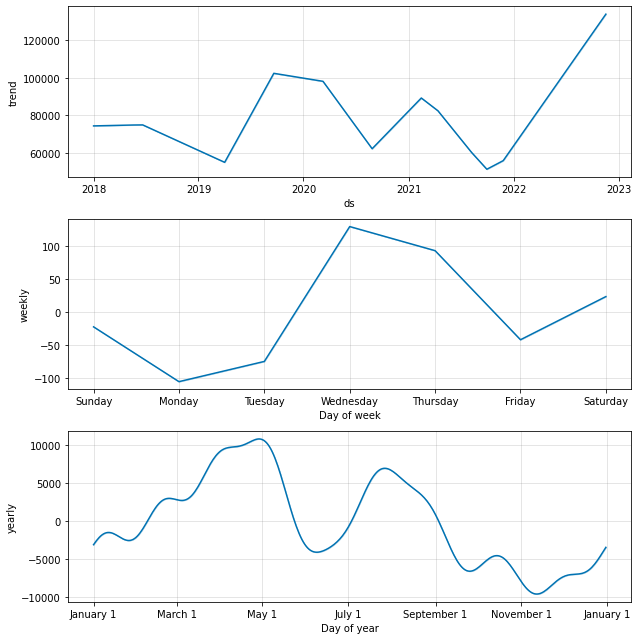

In [172]:
# Make prediction
forecast = model.predict(df_jkt)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [173]:
# Merge actual and predicted values
performance = pd.merge(df_jkt, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 149454473.97997215
The MAPE for the model is 0.13217942902783092


In [174]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1781
1       2
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
1654,2022-07-13,141200.0,109901.099912,79593.536272,140952.617706,1
1656,2022-07-15,141200.0,110935.553347,81831.852896,140577.416951,1


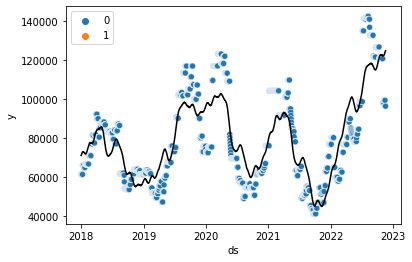

In [175]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies

Makassar City

In [176]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_mks)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/16pugzrd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/1chgnbm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9203', 'data', 'file=/tmp/tmpwhxm3r_0/16pugzrd.json', 'init=/tmp/tmpwhxm3r_0/1chgnbm_.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_model8gq_hlcd/prophet_model-20221120123355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


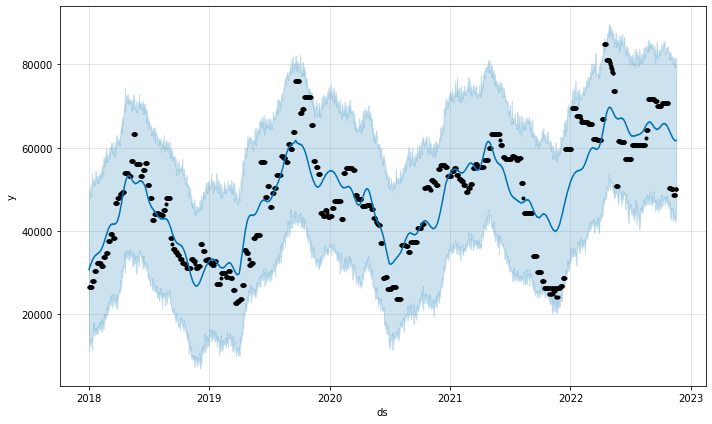

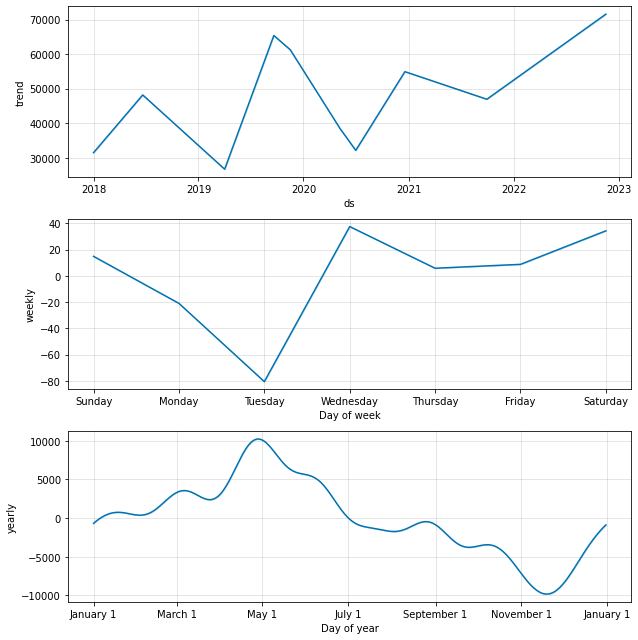

In [177]:
# Make prediction
forecast = model.predict(df_mks)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [178]:
# Merge actual and predicted values
performance = pd.merge(df_mks, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 52435234.65964379
The MAPE for the model is 0.1323964328035328


In [180]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1775
1       8
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
1386,2021-10-18,26400.0,43803.130069,26647.310606,61668.490822,1
1387,2021-10-19,26400.0,43646.745901,26678.534075,61131.545796,1
1392,2021-10-24,26400.0,43072.696327,26658.100191,63948.757911,1
1442,2021-12-13,28800.0,46126.605566,29213.389944,66120.832697,1
1564,2022-04-14,84850.0,65757.114358,47532.908300,84378.006091,1
1565,2022-04-15,84850.0,66181.769329,47646.614515,83531.271823,1
1567,2022-04-17,84850.0,66995.751557,49289.880429,84748.765962,1
1600,2022-05-20,50750.0,67176.074791,50855.164412,84154.274033,1


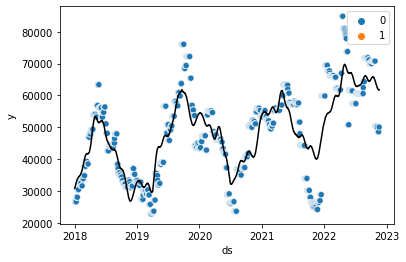

In [181]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies

Medan

In [183]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_mdn)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/x7uggjds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/pu6s4wbe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97470', 'data', 'file=/tmp/tmpwhxm3r_0/x7uggjds.json', 'init=/tmp/tmpwhxm3r_0/pu6s4wbe.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_model68ih2ths/prophet_model-20221120123526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


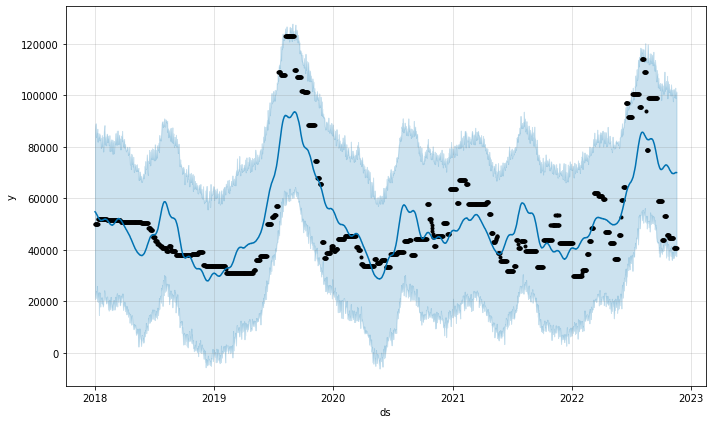

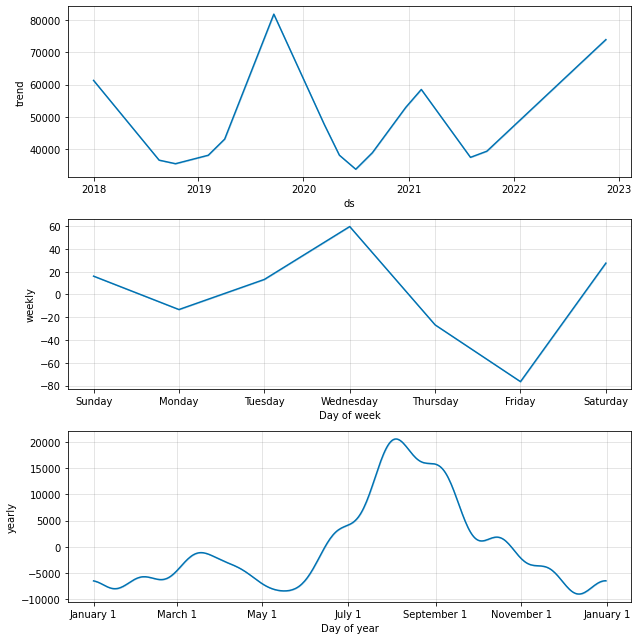

In [184]:
# Make prediction
forecast = model.predict(df_mdn)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [185]:
# Merge actual and predicted values
performance = pd.merge(df_mdn, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 152577211.2456605
The MAPE for the model is 0.19456412291074768


In [186]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1759
1      24
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
562,2019-07-17,109000.0,77607.283446,46601.043434,108972.156527,1
584,2019-08-08,123000.0,92206.886373,57567.559541,122691.329088,1
588,2019-08-12,123000.0,91975.472042,62069.655204,122370.461303,1
589,2019-08-13,123000.0,91888.871110,60977.801648,122706.831348,1
590,2019-08-14,123000.0,91819.004831,60750.714236,121899.747242,1
591,2019-08-15,123000.0,91621.151673,59197.109428,122131.482914,1
593,2019-08-17,123000.0,91495.672040,60025.731075,122822.500770,1
595,2019-08-19,123000.0,91371.311535,62103.778734,120963.999416,1
602,2019-08-26,123000.0,92069.913401,61537.928577,122912.890378,1
603,2019-08-27,123000.0,92296.683762,61332.912681,121159.047854,1


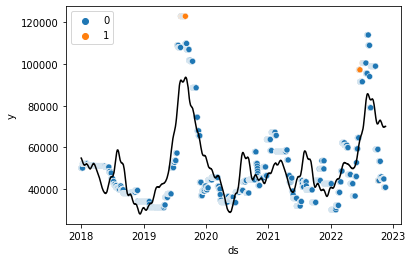

In [187]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies

Palembang

In [188]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_plb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/d7gbfo98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/mykp2q6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71284', 'data', 'file=/tmp/tmpwhxm3r_0/d7gbfo98.json', 'init=/tmp/tmpwhxm3r_0/mykp2q6b.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_modeluxy9il20/prophet_model-20221120123633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


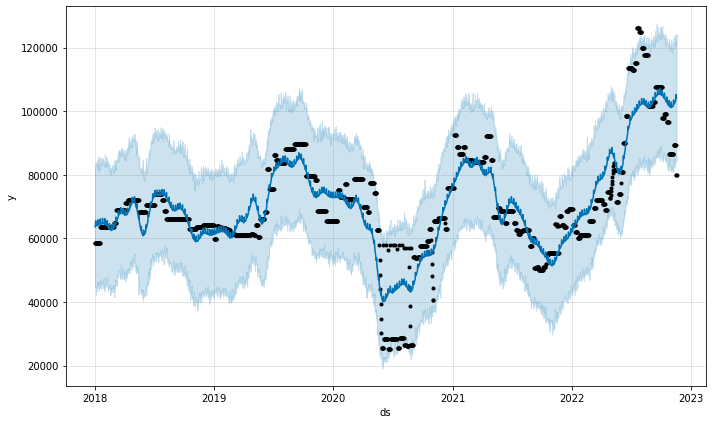

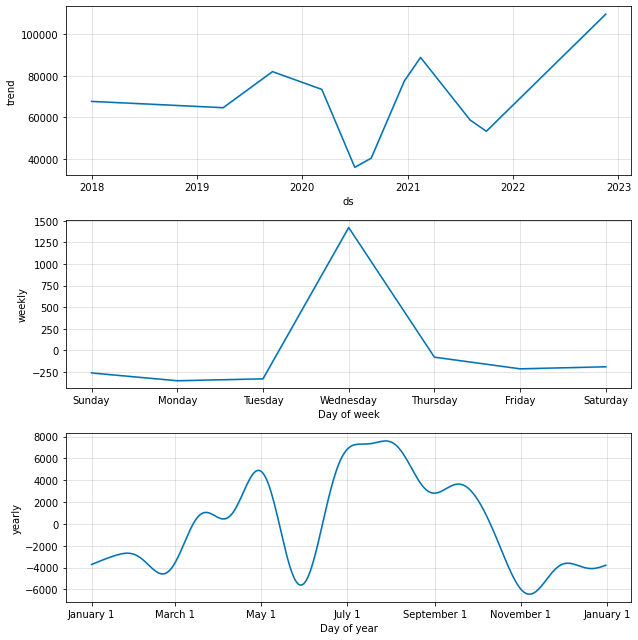

In [189]:
# Make prediction
forecast = model.predict(df_plb)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [190]:
# Merge actual and predicted values
performance = pd.merge(df_plb, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 56164948.15949548
The MAPE for the model is 0.09411869757481489


In [191]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1749
1      34
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
854,2020-05-04,77450.0,58978.202148,40228.485771,77414.580245,1
855,2020-05-05,77450.0,58388.415896,40742.708915,76900.421671,1
860,2020-05-10,74200.0,54754.463103,37536.119160,73658.686022,1
861,2020-05-11,74200.0,53824.103900,34751.253772,72043.130799,1
862,2020-05-12,74200.0,52984.986041,35884.357267,71832.113359,1
900,2020-06-19,25250.0,42880.713300,25404.586387,61054.247440,1
927,2020-07-16,25600.0,44433.432168,27103.919669,62459.049142,1
928,2020-07-17,25600.0,44390.455356,27581.547715,63152.843122,1
930,2020-07-19,25600.0,44539.087249,25782.036558,62779.385810,1
932,2020-07-21,25600.0,44680.743857,27992.343946,63890.367131,1


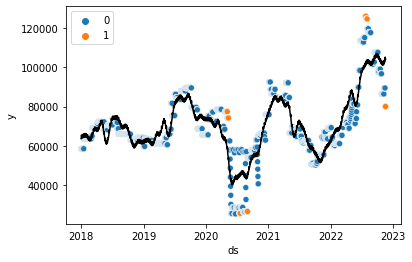

In [192]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies

Pekanbaru City

In [193]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_pkb)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/2zue158w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/teuq7466.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54957', 'data', 'file=/tmp/tmpwhxm3r_0/2zue158w.json', 'init=/tmp/tmpwhxm3r_0/teuq7466.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_modelijv2wfje/prophet_model-20221120123822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:38:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


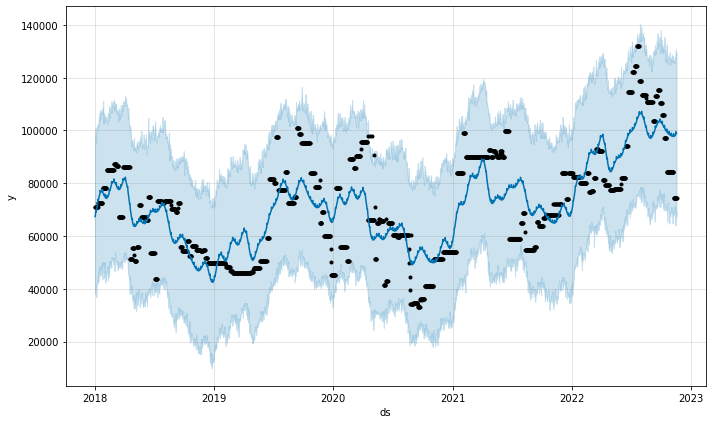

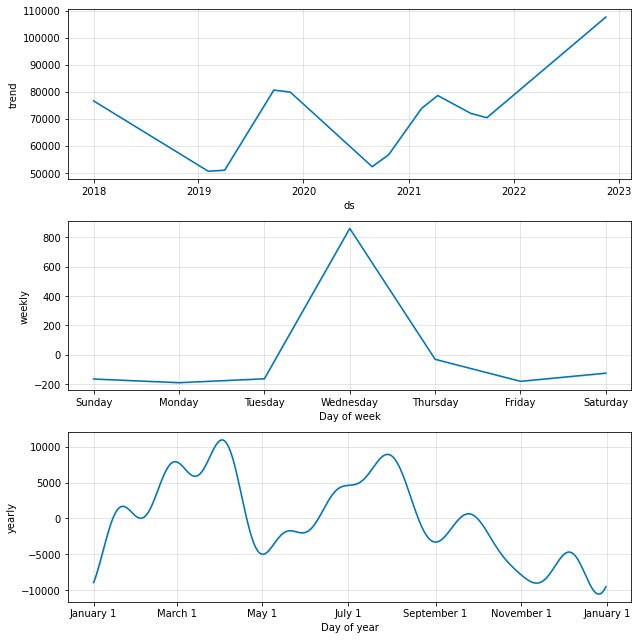

In [194]:
# Make prediction
forecast = model.predict(df_pkb)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [195]:
# Merge actual and predicted values
performance = pd.merge(df_pkb, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 135396460.68424898
The MAPE for the model is 0.14526028075284833


,ds,y,yhat,yhat_lower,yhat_upper,anomaly
842,2020-04-22,98000.0,63563.653442,35390.103235,94032.245331,1
849,2020-04-29,98000.0,59924.644442,30574.366742,90255.652143,1


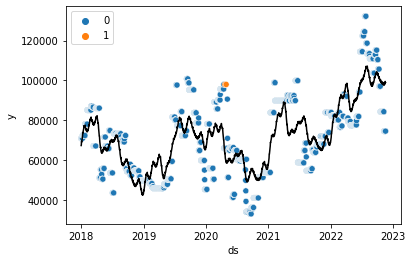

In [196]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
# Check the number of anomalies
performance['anomaly'].value_counts()
anomalies

Surabaya City

In [197]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_sby)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/kh7n1f9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/ycoroi1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8432', 'data', 'file=/tmp/tmpwhxm3r_0/kh7n1f9q.json', 'init=/tmp/tmpwhxm3r_0/ycoroi1x.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_modeledvwnb__/prophet_model-20221120123907.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:39:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:39:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


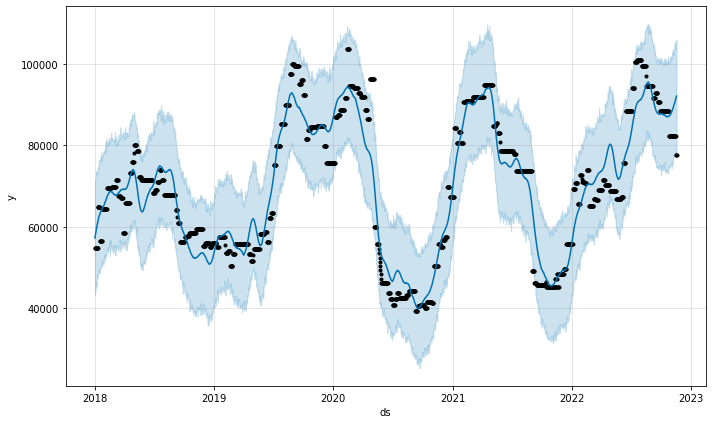

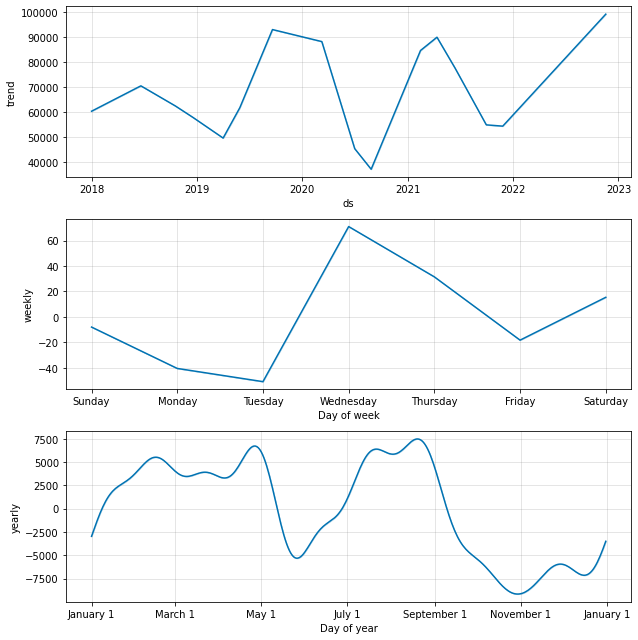

In [198]:
# Make prediction
forecast = model.predict(df_sby)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [199]:
# Merge actual and predicted values
performance = pd.merge(df_sby, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 27755525.55561207
The MAPE for the model is 0.06015743962988265


In [201]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1758
1      25
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
735,2020-01-06,75800.0,88738.555903,75962.726111,103173.146170,1
842,2020-04-22,96250.0,78046.046833,64613.747430,92931.575442,1
843,2020-04-23,96250.0,77800.087000,64380.914066,89834.530706,1
844,2020-04-24,96250.0,77505.870935,64633.152849,91195.925243,1
845,2020-04-25,96250.0,77251.084614,64001.060471,89975.251782,1
846,2020-04-26,96250.0,76889.995649,64228.647825,90799.916801,1
847,2020-04-27,96250.0,76466.008116,63533.708986,91076.684643,1
848,2020-04-28,96250.0,76006.750935,61844.935387,89878.475905,1
849,2020-04-29,96250.0,75619.721967,62095.301236,88616.353966,1
850,2020-04-30,96250.0,75009.658380,61416.844620,90621.643247,1


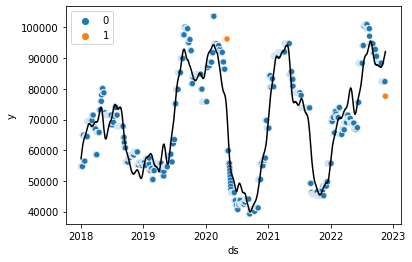

In [202]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies

Yogyakarta City

In [203]:
# Add seasonality
model = Prophet(interval_width=0.99, yearly_seasonality=True, weekly_seasonality=True)
# Fit the model on the training dataset
model.fit(df_ygt)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/i7w7jafr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhxm3r_0/1rakzc4b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67003', 'data', 'file=/tmp/tmpwhxm3r_0/i7w7jafr.json', 'init=/tmp/tmpwhxm3r_0/1rakzc4b.json', 'output', 'file=/tmp/tmpwhxm3r_0/prophet_modelqmaccqjn/prophet_model-20221120124017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:40:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:40:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


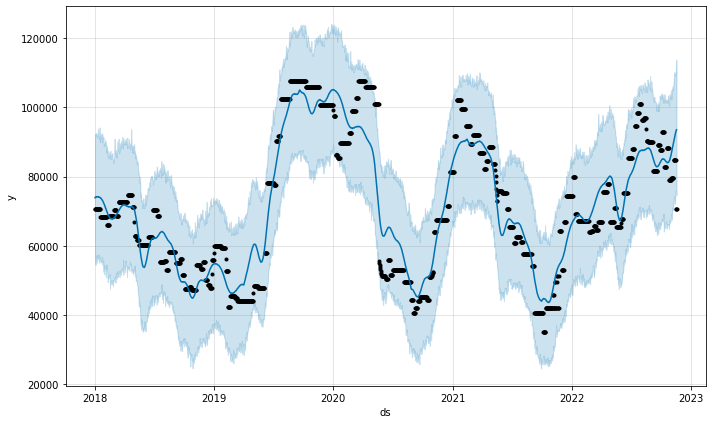

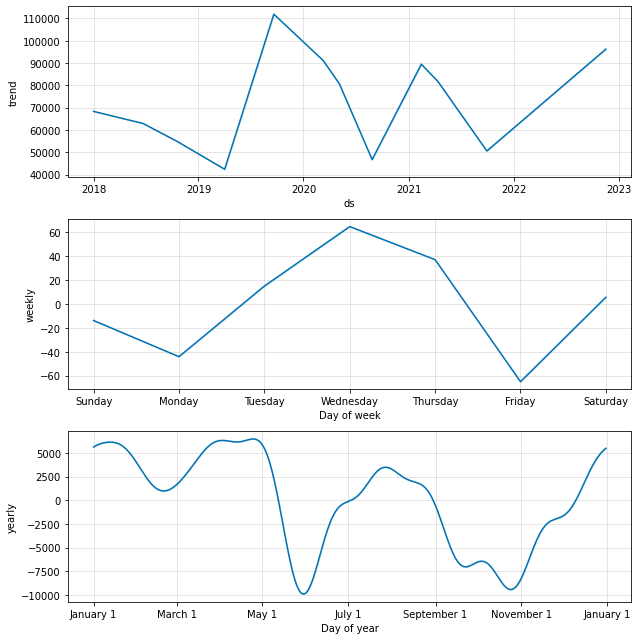

In [204]:
# Make prediction
forecast = model.predict(df_ygt)
# Visualize the forecast
model.plot(forecast);
# Visualize the forecast components
model.plot_components(forecast);

In [205]:
# Merge actual and predicted values
performance = pd.merge(df_ygt, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
# Check MSE value
performance_MSE = mean_squared_error(performance['y'], performance['yhat'])
print(f'The MSE for the model is {performance_MSE}')
# Check MAPE value
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'The MAPE for the model is {performance_MAPE}')

The MSE for the model is 50328519.98833528
The MAPE for the model is 0.08253128540916975


In [206]:
# Create an anomaly indicator
performance['anomaly'] = performance.apply(lambda rows: 1 if ((rows.y<rows.yhat_lower)|(rows.y>rows.yhat_upper)) else 0, axis = 1)
# Check the number of anomalies
performance['anomaly'].value_counts()

0    1753
1      30
Name: anomaly, dtype: int64

,ds,y,yhat,yhat_lower,yhat_upper,anomaly
738,2020-01-09,86350.0,104638.914210,87035.470273,121135.589582,1
740,2020-01-11,86350.0,104416.724950,87301.742785,122468.759600,1
741,2020-01-12,86350.0,104291.597469,87231.900322,121987.753798,1
743,2020-01-14,86350.0,104086.700633,86380.094966,122261.024725,1
744,2020-01-15,85450.0,104007.231387,86151.751757,123041.679509,1
745,2020-01-16,85450.0,103840.737467,86831.876873,122412.205312,1
746,2020-01-17,85450.0,103589.381007,86709.482864,121724.806030,1
750,2020-01-21,85450.0,102951.705899,86579.451720,120679.361729,1
848,2020-04-28,105700.0,88288.687225,72298.419392,104794.785539,1
849,2020-04-29,105700.0,88023.501654,70871.166592,104266.457900,1


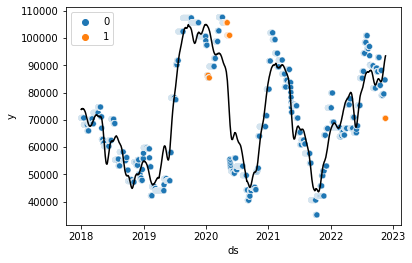

In [207]:
# Take a look at the anomalies
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')
anomalies